In [1]:
%load_ext autoreload
%autoreload 2

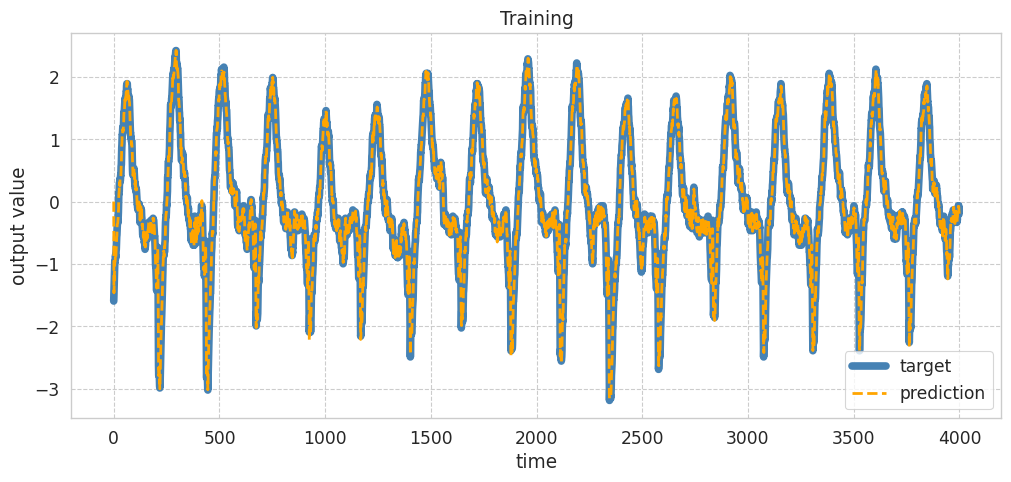

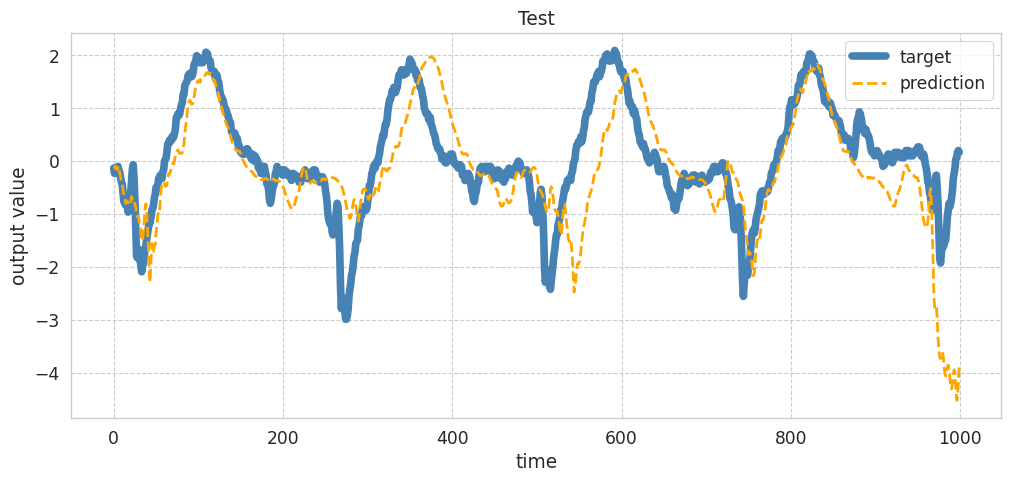

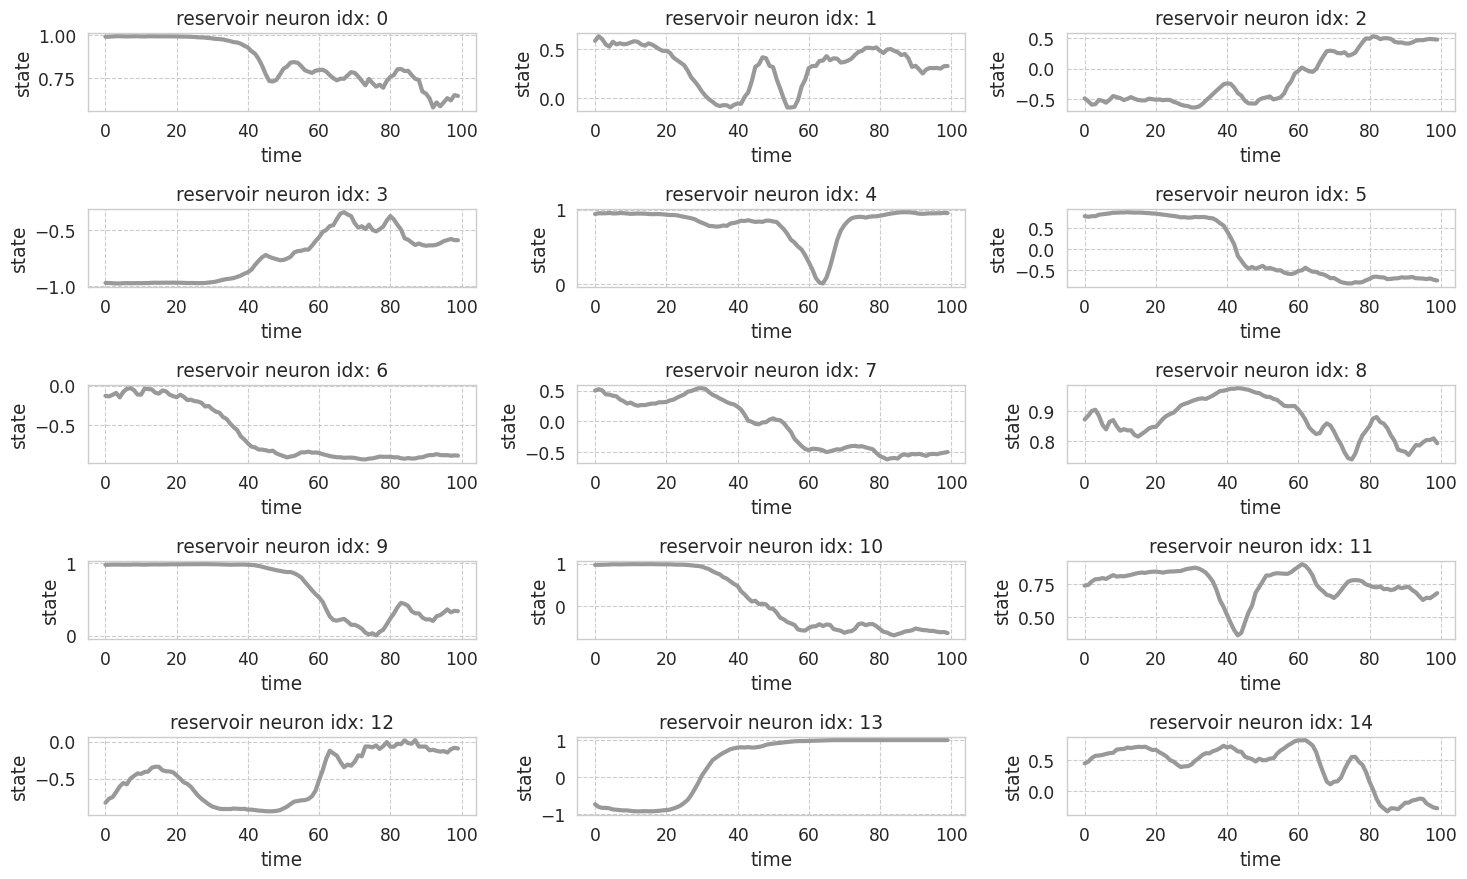

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from echoes import ESNGenerator
from echoes.plotting import (
    plot_predicted_ts,
    set_mystyle, 
    plot_reservoir_activity, 
    plot_predicted_ts
)

set_mystyle()

# Load and split data
ts = np.loadtxt('../data/afib.txt').reshape(-1, 1)
n_train_steps, n_test_steps = 4000, 1000
n_total_steps = n_train_steps + n_test_steps

y_train, y_test = train_test_split(
    ts, 
    train_size=n_train_steps, 
    test_size=n_test_steps, 
    shuffle=False
)

esn = ESNGenerator(
    n_steps=n_test_steps,
    n_reservoir=1000,
    spectral_radius=1.9,
    random_state=42,
    store_states_pred=True,
)

scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
esn.fit(y=y_train)
y_pred = esn.predict()

plot_predicted_ts(y_train, esn.training_prediction_, figsize=(12, 5), title="Training")
plot_predicted_ts(y_test, y_pred, figsize=(12, 5), title="Test")
plot_reservoir_activity(
    esn,
    neurons=list(range(15)),
    pred=True,
    start=100,
    end=200,
);